In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import butter, lfilter
from scipy.signal import freqs

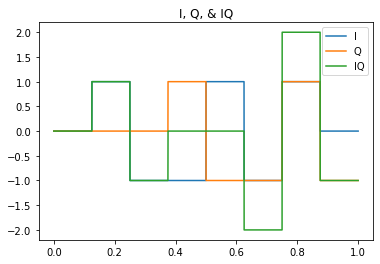

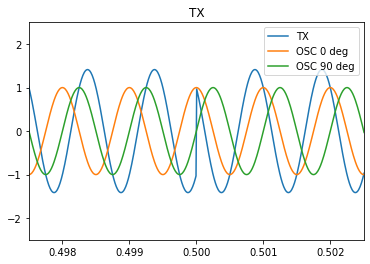

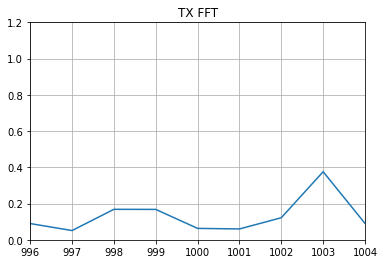

In [8]:
fs = 100000    # Sample rate, Hz
N = fs         # Number of sample points
T = 1.0 / fs   # Sample spacing

i = np.linspace(0, N*T, N)

fc = 1000;  # (Hz) Carrier Frequency
fb = 1;     # (Hz) Baseband Signal Frequency

# Transmission oscillators
osc_0 = np.cos(2*np.pi*fc*i)
osc_90 = np.sin(2*np.pi*fc*i)

i = np.linspace(0, N*T, N)

# Generate IQ data
I = np.zeros(N)
Q = np.zeros(N)

# Sine Wave
#I = np.sin(2*np.pi*fb*i)
#Q = np.cos(2*np.pi*fb*i)

# Square Pattern
for ii in range(N):
    if ii < N*(1/8):
        I[ii] = 0
        Q[ii] = 0
    elif ii < N*(2/8):
        I[ii] = 1
        Q[ii] = 0
    elif ii < N*(3/8):
        I[ii] = -1
        Q[ii] = 0
    elif ii < N*(4/8):
        I[ii] = -1
        Q[ii] = 1
    elif ii < N*(5/8):
        I[ii] = 1
        Q[ii] = -1
    elif ii < N*(6/8):
        I[ii] = -1
        Q[ii] = -1        
    elif ii < N*(7/8):
        I[ii] = 1
        Q[ii] = 1
    elif ii < N*(8/8):
        I[ii] = 0
        Q[ii] = -1
        
IQ = I+Q

# Generate RF and 'transmit'
RF = I*osc_0 + Q*osc_90
TX = RF

plt.plot(i, I, label='I')
plt.plot(i, Q, label='Q')
plt.plot(i, IQ, label='IQ')
plt.legend()
plt.title('I, Q, & IQ')
plt.show()

plt.plot(i, TX, label='TX')
plt.plot(i, osc_0, label='OSC 0 deg')
plt.plot(i, osc_90, label='OSC 90 deg')
plt.legend()
plt.axis([0.4975,0.5025,-2.5,2.5])
plt.title('TX')
plt.show()

yf = fft(TX)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.axis([996,1004,0,1.2])
plt.title('TX FFT')
plt.grid()
plt.show()

In [9]:
# Filter parameters
order = 4        # Butterworth filter order
cutoff = 100     # Desired cutoff frequency of the filter, Hz

# Low Pass filtering for RX
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

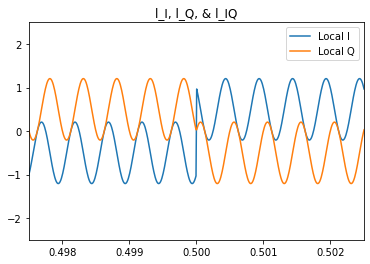

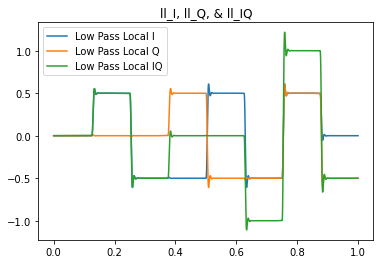

In [10]:
# Receive transmission
RX = TX

# Local oscillator
losc_0 = np.cos(2*np.pi*fc*i)
losc_90 = np.sin(2*np.pi*fc*i)

# Mix with local oscillator
l_I = losc_0 * RX
l_Q = losc_90 * RX
l_IQ = l_I + l_Q

plt.plot(i, l_I, label='Local I')
plt.plot(i, l_Q, label='Local Q')
plt.legend()
plt.axis([0.4975,0.5025,-2.5,2.5])
plt.title('l_I, l_Q, & l_IQ')
plt.show()

# Recover IQ Data
ll_I = butter_lowpass_filter(l_I, cutoff, fs, order)
ll_Q = butter_lowpass_filter(l_Q, cutoff, fs, order)

ll_IQ = ll_I + ll_Q

plt.plot(i, ll_I, label='Low Pass Local I')
plt.plot(i, ll_Q, label='Low Pass Local Q')
plt.plot(i, ll_IQ, label='Low Pass Local IQ')
plt.legend()
plt.title('ll_I, ll_Q, & ll_IQ')
plt.show()